# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url="https://api.openweathermap.org/data/2.5/weather?"
print (" Beginning Data Retrieval ")
print (" -------------------------")
totalnumber=len(cities)
#define the list of all the target data
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]


for n in cities:
    recordnumber=cities.index(n)
    query_url = url + "q=" + n  + "&appid="+ api_key
    weather_response = requests.get(query_url).json()
    if weather_response['cod']==200:
        #append the list of the value
        print(f'Processing Record {recordnumber} of {totalnumber} | {n}')
        City.append(weather_response['name'])
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        Humidity.append(weather_response['main']['humidity'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
    elif weather_response['cod']==404:
        print("City not found. Skipping...")
print (" -------------------------")
print ('Data Retrieval Complete')
print (" -------------------------")   

 Beginning Data Retrieval 
 -------------------------
Processing Record 0 of 606 | luanda
Processing Record 1 of 606 | port alfred
Processing Record 2 of 606 | cape town
Processing Record 3 of 606 | kapaa
Processing Record 4 of 606 | sao jose da coroa grande
Processing Record 5 of 606 | mataura
Processing Record 6 of 606 | airai
Processing Record 8 of 606 | kampong thum
Processing Record 10 of 606 | narsaq
Processing Record 11 of 606 | okmulgee
Processing Record 12 of 606 | broken hill
Processing Record 15 of 606 | ushuaia
Processing Record 16 of 606 | yellowknife
Processing Record 17 of 606 | rincon
Processing Record 18 of 606 | vaini
Processing Record 19 of 606 | severo-kurilsk
Processing Record 20 of 606 | perth
Processing Record 21 of 606 | tecpan
Processing Record 22 of 606 | atuona
Processing Record 23 of 606 | crotone
Processing Record 24 of 606 | norman wells
Processing Record 25 of 606 | mahebourg
Processing Record 26 of 606 | qaanaaq
Processing Record 27 of 606 | port elizabe

Processing Record 233 of 606 | zitlala
Processing Record 234 of 606 | tilichiki
Processing Record 236 of 606 | saint george
Processing Record 237 of 606 | mian channun
Processing Record 238 of 606 | pirapora
Processing Record 240 of 606 | jiayuguan
Processing Record 241 of 606 | katangli
Processing Record 242 of 606 | nadym
Processing Record 243 of 606 | henties bay
Processing Record 244 of 606 | kearney
Processing Record 245 of 606 | saint-augustin
Processing Record 246 of 606 | georgetown
Processing Record 247 of 606 | gisborne
Processing Record 248 of 606 | namibe
Processing Record 249 of 606 | alofi
Processing Record 250 of 606 | saurimo
Processing Record 251 of 606 | cabo san lucas
Processing Record 252 of 606 | eufaula
Processing Record 253 of 606 | alugan
Processing Record 254 of 606 | wajima
Processing Record 255 of 606 | atasu
Processing Record 256 of 606 | itarema
Processing Record 257 of 606 | bethel
Processing Record 258 of 606 | yichang
Processing Record 259 of 606 | gaine

Processing Record 455 of 606 | nambucca heads
Processing Record 456 of 606 | pangody
Processing Record 457 of 606 | chitungwiza
Processing Record 458 of 606 | eyl
Processing Record 459 of 606 | santa lucia
Processing Record 460 of 606 | otane
Processing Record 461 of 606 | taltal
Processing Record 462 of 606 | fayaoue
Processing Record 464 of 606 | konstantinovka
Processing Record 465 of 606 | tiarei
Processing Record 466 of 606 | kulu
Processing Record 467 of 606 | floro
Processing Record 468 of 606 | antofagasta
Processing Record 469 of 606 | ixtapa
Processing Record 470 of 606 | carnarvon
Processing Record 471 of 606 | kupino
Processing Record 472 of 606 | lardos
Processing Record 474 of 606 | west bay
Processing Record 475 of 606 | urucara
Processing Record 476 of 606 | springbok
Processing Record 478 of 606 | harper
Processing Record 479 of 606 | humaita
Processing Record 480 of 606 | siavonga
Processing Record 481 of 606 | husavik
Processing Record 482 of 606 | ormara
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
dic={"City":City,'Cloudiness':Cloudiness,"Country":Country,'Date':Date,"Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind Speed":Wind_Speed}
df=pd.DataFrame(dic)
# Output File (CSV)
df.to_csv('cities_weather_report')

In [5]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Luanda,40,AO,1551661200,88,-8.83,13.24,300.150,1.00
1,Port Alfred,0,ZA,1551663274,91,-33.59,26.89,292.590,2.06
2,Cape Town,0,ZA,1551663312,93,-33.93,18.42,293.150,3.10
3,Kapaa,90,US,1551663510,56,22.08,-159.32,297.150,8.70
4,Sao Jose da Coroa Grande,64,BR,1551663666,97,-8.90,-35.15,298.037,3.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

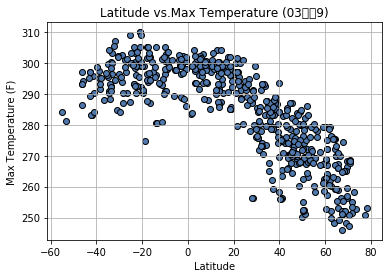

In [6]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Max Temp'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("Latitude vs.Max Temperature (03\03\19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsMaxTemperature")

#### Latitude vs. Humidity Plot

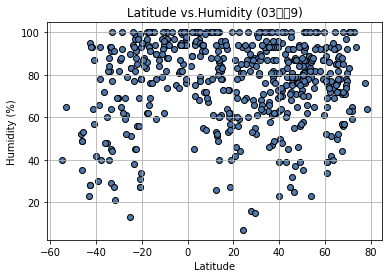

In [7]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Humidity'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("Latitude vs.Humidity (03\03\19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsHumidity")

#### Latitude vs. Cloudiness Plot

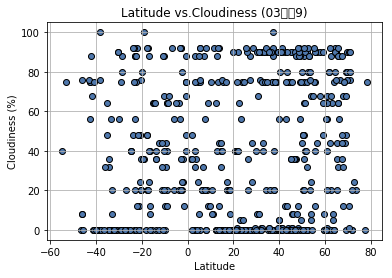

In [8]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Cloudiness'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("Latitude vs.Cloudiness (03\03\19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsCloudiness")

#### Latitude vs. Wind Speed Plot

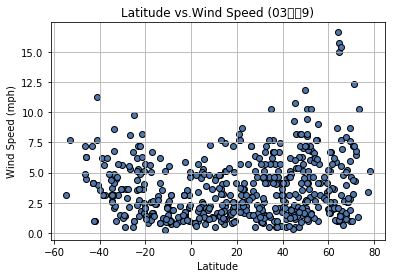

In [9]:
fig, ax = plt.subplots()
LatvsTemp = plt.scatter(df['Lat'],df['Wind Speed'] ,marker='o', 
                        c='#4F78AD',edgecolors='black')
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("Latitude vs.Wind Speed (03\03\19)")
ax=plt.grid()
plt.show()
fig.savefig("LatitudevsWind Speed")